Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB
None

First 5 Rows:
   StudentID   

/tmp/ipython-input-2729122646.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


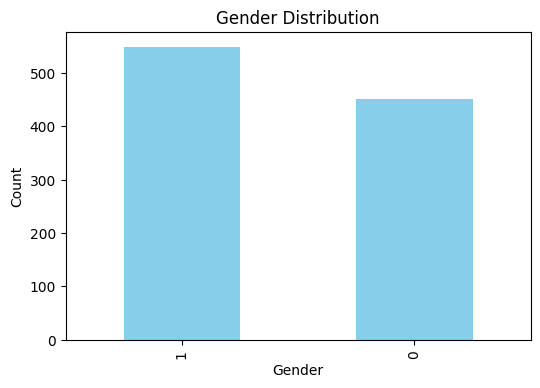

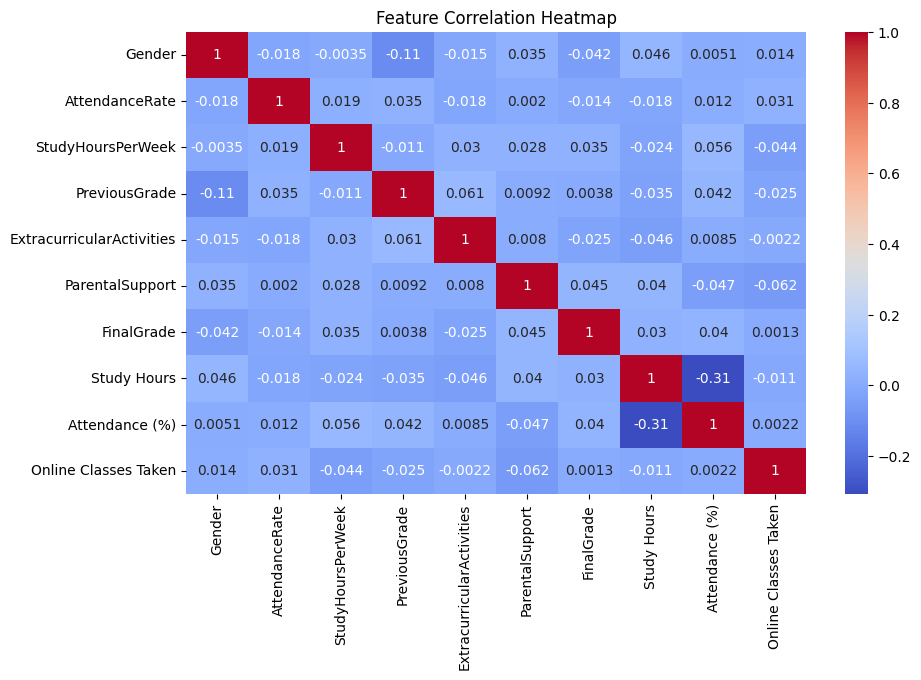

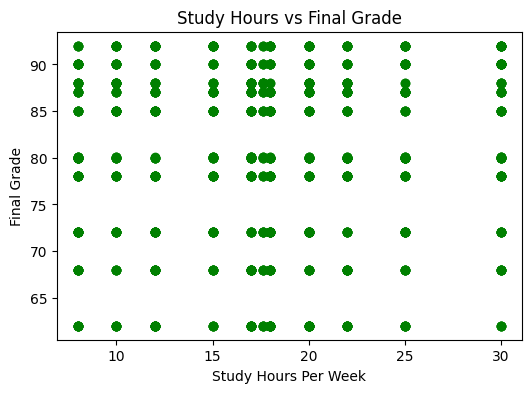


🎯 Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [2]:
# 📘 Student Performance Data Science Project
# ------------------------------------------
# Steps:
# 1. Load and inspect dataset
# 2. Clean data (handle missing values, encode categories)
# 3. Visualize data (bar graph, heatmap, scatter)
# 4. Train model (Random Forest)
# 5. Evaluate accuracy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ----------------------------
# 1. Load the dataset
# ----------------------------
df = pd.read_csv("/content/student_performance_updated_1000.csv")

# Display basic info
print("Initial Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# ----------------------------
# 2. Data Cleaning
# ----------------------------
# Drop irrelevant columns
df = df.drop(columns=["StudentID", "Name"], errors="ignore")

# Fill missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nAfter Cleaning:")
print(df.head())

# ----------------------------
# 3. Visualization
# ----------------------------

# Bar Graph - Gender distribution
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Heatmap - Correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scatter plot - Study Hours vs Final Grade
plt.figure(figsize=(6, 4))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], color='green')
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Final Grade')
plt.show()

# ----------------------------
# 4. Model Training
# ----------------------------
# Split features and target
X = df.drop(columns=['FinalGrade'], errors="ignore")
y = df['FinalGrade']

# Convert target to binary (Pass/Fail)
y = (y >= 50).astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# ----------------------------
# 5. Evaluation
# ----------------------------
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n🎯 Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)
